Google Trends provides an API that can be used to analyze the daily searches on Google. This API is known as pytrends

In [ ]:
# pip install pytrends

https://pypi.org/project/pytrends/#multirange_interest_over_time

https://github.com/pat310/google-trends-api

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pytrends.request import TrendReq


In [ ]:
# google trendsler ile nasıl analizler yapabilirim bunu araştırdım. En doğru sonucu elde etmek için
# verilerin doğruluğunu konntrol ettim. Bazı methodlar kullanışlı değildi.
#  benim için en kullanışlı method 
# trends.related_topics() ve trends.related_queries methodlarından yararlanmak oldu.
# en çok arananlar kısmı doğru çalışmıyordu bundan dolayı bu kısmı kullanabilir hale getirdim...

In [6]:
trends= TrendReq(hl='tr-TR', tz=360)

In [85]:
df_trends = pd.DataFrame()
for i in range(2011,2023):
    top_trends = trends.top_charts(i, hl='tr-TR', tz=300, geo='TR')
    df_trends = pd.concat([df_trends,pd.Series(top_trends["title"], name=i)], axis=1)
df_trends

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Muhteşem Yüzyıl,Facebook,GÜNEŞİ BEKLERKEN,Kiraz Mevsimi,Kiralık Aşk,Artık Yıl,Game Of Thrones,Sen Anlat Karadeniz,İstanbul Seçim Sonuçları 2019,EBA,EBA giriş,Dolar/TL
1,E Devlet,YouTube,KARADAYI,Güneşi Beklerken,Poyraz Karayel,Güneş Tutulması,Fi,Çukur,Geleceğe Nefes,Dolar Kaç TL,Squid Game,Bayram tatili kaç gün
2,Adini Feriha Koydum,e-Okul,MEDCEZİR,Kaçak Gelinler,Çilek Kokusu,Dünya Kadınlar Günü,İçerde,Ufak Tefek Cinayetler,YSK,Corona Virüsü,AÖL,ÖBA
3,Trendyol,Ösym,BİR AŞK HİKAYESİ,Kardeş Payı,Aşk Yeniden,Ohal,Kalp Atışı,Bir Zamanlar Çukurova,Deprem,Deprem,Mesut Özil,Bergen
4,Ask Tesadufleri Sever,Ekşi Sözlük,TATAR RAMAZAN,Medcezir,Güneşin Kızları,Saat Farkı,İsimsizler,Erkenci Kuş,Sigara Fiyatları,Zoom,Elmalı Davası,Kedi
5,Acunn,Araba Oyunları,BABAM SINIFTA KALDI,Ulan İstanbul,Acil Aşk Aranıyor,NaN,İstanbullu Gelin,Jet Sosyete,Dolar Kuru,HES Kodu Alma,MHRS randevu,Ukrayna
6,Wolfteam,Milliyet,ÇALIKUŞU,Güllerin Savaşı,İnadına Aşk,NaN,Siyah Beyaz Aşk,Avlu,Askerlik Son Dakika,Kandilli Rasathanesi,Okulun ilk günü,Toki başvuru
7,Incir Receli,Işkur,İŞLER GÜÇLER,Küçük Ağa,Kırgın Çiçekler,NaN,Şevket Yerimdar,NaN,EYT,Sokağa Çıkma Yasağı,Sadakatsiz,Galatasaray Barcelona
8,Defne Joy Foster,Hürriyet,FATİH HARBİYE,Kara Para Aşk,Eşkiya Dünyaya Hükümdar Olmaz,NaN,Söz,NaN,İstiklal Marşı 10 Kıta,Sağlık Bakanlığı,Sezai Karakoç,Asgari ücret
9,Aref,Habertük,BENİ BÖYLE SEV,Reaksiyon,Kara Ekmek,NaN,Stranger Things,NaN,Notre Dame Katedrali,ABD Seçimleri,HES kodu alma,Ahmet Çalık


In [ ]:
# Listeler, geçen yılla karşılaştırıldığında bu yıl en fazla artış gösteren arama terimlerine dayanır.

In [225]:
# konulara göre ayrım yapılmış şekilde sonuç dönüyor ve ilk sütunu döndüğü için kulanışlı değil.

## Yıllara göre Rise-Topics ve Top-Topics

In [ ]:
# rising
# Yükselen aramalar, girdiğiniz anahtar kelime ile aranan ve istenen dönemde hacmi en fazla 
# artan terimlerdir (veya hiçbir anahtar kelime girilmediyse genel aramalardır). 
# Yükselişte olan her arama terimi için, terimin önceki döneme kıyasla büyüme yüzdesini görürsünüz. 
# Yüzde yerine "Büyük Çıkış" görüyorsanız bu, arama teriminin 
# %5.000'in üzerinde bir büyüme gösterdiği anlamına gelir.

In [ ]:
# Konu analizi için pytrends.related_topics() fonksiyonundan yararlanacağım.

In [3]:
trends = TrendReq(hl='tr-TR', tz=360, timeout=(30));

In [4]:
topics_rise = pd.DataFrame()
topics_top = pd.DataFrame()
for i in range(2011,2023): # 2011, 2022 dahil.
    kw_list = [" "]
    cat = 0
    timeframe=f"{i-1}"+"-12-31 " + f"{i+1}" + "-01-01"
    geo = "TR"
    trends.build_payload(kw_list, cat, timeframe, geo)
    konular = trends.related_topics()

    df_r = konular[""]["rising"][["topic_title","topic_type", "value"]]
    df_r = df_r.rename(columns={'topic_title': f'title_{i}', 'topic_type': f"type_{i}", 'value': f"value_{i}" })

    df_t = konular[""]["top"][["topic_title","topic_type", "value"]]
    df_t = df_t.rename(columns={'topic_title': f'title_{i}', 'topic_type': f"type_{i}", 'value': f"value_{i}" })

    topics_rise = pd.concat([topics_rise, df_r], axis=1)
    topics_top = pd.concat([topics_top, df_t], axis=1)

# 429 istek hatası verebiliyor, tekrar çalıştırmak gerekir.

In [5]:
topics_top.head()

,title_2011,type_2011,value_2011,title_2012,type_2012,value_2012,title_2013,type_2013,value_2013,title_2014,...,value_2019,title_2020,type_2020,value_2020,title_2021,type_2021,value_2021,title_2022,type_2022,value_2022
0,Facebook,Sosyal ağ,100,Facebook,Sosyal ağ,100,Facebook,Sosyal ağ,100,Facebook,...,100,Hava Durumu,Konu,100,Hava Durumu,Konu,100,Hava Durumu,Konu,100
1,Oyun,Konu,25,YouTube,Şirket,24,YouTube,Şirket,24,YouTube,...,79,Fiyat,Konu,81,Fiyat,Konu,76,Fiyat,Konu,72
2,YouTube,Şirket,14,Oyun,Konu,22,Oyun,Konu,16,Google,...,70,YouTube,Şirket,69,Çeviri,Konu,63,Çeviri,Konu,59
3,Mynet,İnternet sitesi,12,İndirme,Konu,12,Google,Şirket,11,Oyun,...,63,Çeviri,Konu,67,ABD Doları,Para Birimi,60,ABD Doları,Para Birimi,43
4,İndirme,Konu,12,Mynet,İnternet sitesi,12,Film,Konu,10,İndirme,...,59,2020,Konu,54,Altın,Element,51,2022,Konu,42


In [10]:
topics_rise
# Çok fazla NaN değer mevcut. Bundan dolayı pytrends.related_topics() ile karşılaştıracağım.
# Farklılıklara göre veya en doğru sonucu hangi sorgudan alırsam analizleri ona göre devam ettireceğim.

,title_2011,type_2011,value_2011,title_2012,type_2012,value_2012,title_2013,type_2013,value_2013,title_2014,...,value_2019,title_2020,type_2020,value_2020,title_2021,type_2021,value_2021,title_2022,type_2022,value_2022
0,Muhteşem Yüzyıl,TV dizisi,1200.0,Ask.fm,Konu,2600.0,2014,Konu,1800.0,Kiraz Mevsimi,...,2800.0,Koronavirüs,Virüs,34350,2022,Konu,2450,2023,Konu,1900.0
1,2012,Konu,950.0,YouTube-MP3,İnternet sitesi,900.0,2013,Konu,600.0,Recep İvedik 4,...,800.0,COVID-19,Hastalık,19550,Binance,Konu,1350,2022,Konu,1150.0
2,Acun Ilıcalı,Televizyon sunucusu,800.0,2012,Konu,550.0,Sözcü,Gazete,300.0,2014,...,300.0,Sokağa çıkma yasağı,Konu,11950,2021,Konu,1200,Dünya Kupası,Futbol ligi,900.0
3,2011,Konu,550.0,Transformice,Video oyunu,250.0,Minecraft,Video oyunu,200.0,Seçim,...,90.0,2021,Konu,1400,Madenî Para,Konu,1200,Dünya,Toplum,350.0
4,e-Devlet,Türkiye,550.0,Morhipo,Şirket,250.0,O Ses Türkiye,TV programı,120.0,Dailymotion,...,80.0,Virüs,Enfeksiyöz ajan türü,1200,Bitcoin,Kripto para,350,Kamu Personeli Seçme Sınavı,Konu,110.0
5,Trendyol,Özel şirket,550.0,Samsung Galaxy,Ürün hattı,200.0,Google Arama,Web sitesi,90.0,Recep İvedik,...,70.0,2020,Konu,750,Aşı,İlaç sınıfı,300,Tatil,Konu,80.0
6,Wolfteam,Video oyunu,500.0,Kuzey Güney,TV programı,190.0,Tumblr,Sosyal ağ,80.0,Instagram,...,60.0,EBA,Konu,700,Açık Öğretim Lisesi,Konu,150,Maaş,Konu,70.0
7,Markafoni Ltd.,Şirket,200.0,Global E-Ticaret Bilisim Hizmetleri A.S.,Şirket,160.0,Omegle,İnternet sitesi,70.0,İzlesene.com,...,50.0,Maske,Konu,350,MHRS,Yazılım,140,"Ölçme, Seçme ve Yerleştirme Merkezi","Ankara, Türkiye'de bir devlet dairesi",60.0
8,Muud,Konu,190.0,Acun Ilıcalı,Televizyon sunucusu,120.0,Ask.fm,Konu,70.0,Medcezir,...,50.0,e-Nabız,İnternet sitesi,300,ABD Doları,Para Birimi,120,Bilet,Konu,60.0
9,Limango,Şirket,190.0,Android,İşletim sistemi,120.0,Google,Şirket,60.0,Kamu Personeli Seçme Sınavı,...,50.0,Survivor Türkiye,TV programı,200,Beşiktaş,Futbol takımı,110,Otobüs,Taşıma hizmeti türü,50.0


In [9]:
# topics_rise.to_csv("topics_rise.csv", index=False)
# topics_top.to_csv("topics_top.csv", index=False)

In [52]:
topics_rise = pd.read_csv("topics_rise.csv")
topics_top = pd.read_csv("topics_top.csv")

## Yıllara göre Rise-Query ve Top-Query

In [11]:
trends = TrendReq(hl='tr-TR', tz=360, timeout=(30));

In [148]:
queries_rise = pd.DataFrame()
queries_top = pd.DataFrame()

for i in range(2011,2023): # 2011, 2022 dahil.

    kw_list = [" "]
    cat = 0
    timeframe=f"{i-1}"+"-12-31 " + f"{i+1}" + "-01-01"
    geo = "TR"
    trends.build_payload(kw_list, cat, timeframe, geo)
    queries = trends.related_queries()

    df_rise = queries[""]["rising"][["query", "value"]]
    df_rise = df_rise.rename(columns={'query': f'query_{i}', 'value': f"value_{i}" })

    df_top = queries[""]["top"][["query", "value"]]
    df_top = df_top.rename(columns={'query': f'query_{i}', 'value': f"value_{i}" })

    queries_rise = pd.concat([queries_rise, df_rise], axis=1)
    queries_top = pd.concat([queries_top, df_top], axis=1) 
# 429 Hatası verebiliyor. Hatasız dönene kadar çalıştırmak gerekiyor.


In [152]:
queries_rise.head()
# Google bize önceki yıllara göre artış gösteren sorgu terimlerini veya konumlarını paylaşıyor. 
# Sorgu sonucu dönen arama terimleri sorgudan sorguya değişebiliyor fakat genellikle ön sıradaki ortak değerler değişmiyor.
# Örneğin, Son 10 yıldır aranmayan bir terim bu yıl 1.000 defa aratılması çıkış olarak görünür.
# Fakat bir önceki yıl 10.000 defa aratılmış olan terim bu yıl 10.100 ise geride kalır.

,query_2011,value_2011,query_2012,value_2012,query_2013,value_2013,query_2014,value_2014,query_2015,value_2015,...,query_2018,value_2018,query_2019,value_2019,query_2020,value_2020,query_2021,value_2021,query_2022,value_2022
0,muhteşem yüzyıl,5650,ask.fm,8700,güneşi beklerken,7250,kiraz mevsimi,12650,kiralık aşk,12200,...,sen anlat karadeniz,11350,mucize doktor,6550,sokağa çıkma yasağı,10650,dizipal,5300,brent petrol,2450
1,acunn,5050,gangnam style,6500,halk tv,1850,kaçak gelinler,5300,agar io,6100,...,e devlet soy ağacı,2700,ekrem imamoğlu,1650,koronavirüs,10600,_shopping,2400,disney plus,1850
2,bombom,3650,hahasport,2150,bicaps,1300,arkadaşım hoşgeldin,4550,agario,3550,...,facebook hoşgeldin,750,kandilli rasathanesi,450,yarınki hava durumu,5750,dogecoin,2350,öba,1700
3,morpa kampüs,600,yandex,1700,legend online,550,recep ivedik 4,1750,agarz,2650,...,çukur son bölüm,700,son depremler,200,coronavirus,5400,exxen,1600,dünya kupası,650
4,trendyol,550,tubidy,800,outlook,450,onedio,1100,facebook giriş yap,1050,...,dünya kupası,650,seçim sonuçları,190,corona belirtileri,3150,binance,1600,hektaş hisse,250


In [155]:
queries_top.head()

,query_2011,value_2011,query_2012,value_2012,query_2013,value_2013,query_2014,value_2014,query_2015,value_2015,...,query_2018,value_2018,query_2019,value_2019,query_2020,value_2020,query_2021,value_2021,query_2022,value_2022
0,facebook,100,facebook,100,facebook,100,facebook,100,facebook,100,...,youtube,100,hava,100,hava durumu,100,hava durumu,100,hava durumu,100
1,face,20,youtube,25,youtube,25,youtube,33,youtube,47,...,hava durumu,93,hava durumu,99,youtube,68,dolar,51,çeviri,39
2,youtube,16,face,14,face,13,google,17,google,22,...,facebook,92,youtube,77,son dakika,42,youtube,51,altın,38
3,mynet,15,mynet,13,google,11,sahibinden,15,sahibinden,17,...,son dakika,43,facebook,56,çeviri,41,altın,40,dolar,37
4,sahibinden,11,sahibinden,11,sahibinden,10,face,12,hava durumu,13,...,sahibinden,40,son dakika,39,altın,41,çeviri,37,youtube,34


In [163]:
queries_top.filter(regex="query")
# Aranan terimlerin konuları. Bana veriler çok sağlıklı gelmedi. Çıktılar aynı konular üzerinden olduğu için bu kısmı kullanmayacağım.

,query_2011,query_2012,query_2013,query_2014,query_2015,query_2016,query_2017,query_2018,query_2019,query_2020,query_2021,query_2022
0,facebook,facebook,facebook,facebook,facebook,facebook,facebook,youtube,hava,hava durumu,hava durumu,hava durumu
1,face,youtube,youtube,youtube,youtube,youtube,youtube,hava durumu,hava durumu,youtube,dolar,çeviri
2,youtube,face,face,google,google,hava durumu,hava,facebook,youtube,son dakika,youtube,altın
3,mynet,mynet,google,sahibinden,sahibinden,google,hava durumu,son dakika,facebook,çeviri,altın,dolar
4,sahibinden,sahibinden,sahibinden,face,hava durumu,sahibinden,sahibinden,sahibinden,son dakika,altın,çeviri,youtube
5,oyun,hotmail,hotmail,mynet,haber,haber,son dakika,haber,çeviri,eba,twitter,e devlet
6,e okul,e okul,mynet,milliyet,e okul,son dakika,google,dolar,haber,facebook,e devlet,sahibinden
7,milliyet,oyun,milliyet,hotmail,face,haberler,haber,google,dolar,sahibinden,son dakika,son dakika
8,hotmail,milliyet,twitter,e okul,mynet,face,haberler,çeviri,sahibinden,twitter,facebook,twitter
9,haber,haber,e okul,haber,hotmail,e okul,çeviri,haberler,google,dolar,sahibinden,instagram


In [151]:
# queries_rise.to_csv("queries_rise.csv", index=False)
# queries_top.to_csv("queries_top.csv", index=False)
# # Yukarıdaki sorgu sonucunun değişme ihtimali ve analizin devamı için dataframe i kaydediyorum.

In [159]:
queries_rise = pd.read_csv("queries_rise.csv")
queries_top = pd.read_csv("queries_top.csv")

In [164]:
queries_rise.filter(regex="query")


,query_2011,query_2012,query_2013,query_2014,query_2015,query_2016,query_2017,query_2018,query_2019,query_2020,query_2021,query_2022
0,muhteşem yüzyıl,ask.fm,güneşi beklerken,kiraz mevsimi,kiralık aşk,letgo,puhu tv,sen anlat karadeniz,mucize doktor,sokağa çıkma yasağı,dizipal,brent petrol
1,acunn,gangnam style,halk tv,kaçak gelinler,agar io,bir garip aşk,milli piyango 2017,e devlet soy ağacı,ekrem imamoğlu,koronavirüs,_shopping,disney plus
2,bombom,hahasport,bicaps,arkadaşım hoşgeldin,agario,kısmetse olur,gece gölgenin rahatına bak,facebook hoşgeldin,kandilli rasathanesi,yarınki hava durumu,dogecoin,öba
3,morpa kampüs,yandex,legend online,recep ivedik 4,agarz,edevlet giriş,içerde son bölüm,çukur son bölüm,son depremler,coronavirus,exxen,dünya kupası
4,trendyol,tubidy,outlook,onedio,facebook giriş yap,kismetse olur,instagram giriş,dünya kupası,seçim sonuçları,corona belirtileri,binance,hektaş hisse
5,grupfoni,vip dükkan,sözcü,ysk,fuat avni,iphone 7,son depremler,youtube mp3 donustusturucu,beinsport,fahrettin koca,ssstiktok,iphone 13 pro max
6,e devlet,youtube mp3,amk,irem derici,hızlı ve öfkeli 7,garanti internet bankacılığı,edevlet giriş,ceyrek altin ne kadar,netflix,hes kodu alma,selçukspor,trt1 canlı
7,edevlet,dizimag,kliksa,dailymotion,dizibox,android oyun club,haber 7,çukur,süperlig,zoom,sedat peker,weather
8,wolfteam,kim milyoner olmak ister,tozlu giyim,izlesene,niloya,fesbuk giriş,hm,seçim sonuçları,justin tv,savefrom.net,coinmarketcap,dolar/tl
9,markofoni,transformice,youtube dönüştürücü,izlesene müzik,tv8,eba,netspor,dolar kuru,namaz vakitleri,eba giriş,bitcoin kaç dolar,obilet


## Konuların belirlenmesi

In [165]:
def find_type(query):
    try: return trends.suggestions(query)[0]["type"] 
    except: return None
# terimlerin konu başlıklarını belirlemek için fonksiyon kurdum.
# pytrends.suggestions() dan yararlandım.
for i in range(2011, 2023):
    loc = queries_rise.columns.get_loc(f"value_{i}")
    column = f"type_{i}"
    value = queries_rise[f"query_{i}"].map(find_type)

    queries_rise.insert(loc, column, value)


In [166]:
queries_rise.head(7)
# bazı konuları hatalı bulmuş, Google algoritmasına göre ilk sıradaki konuyu almasını istedim fakat hatalar mevcut
# bazı konuları ise bulamamış, genellikle yazım yanlışı vb. sebepler.

,query_2011,type_2011,value_2011,query_2012,type_2012,value_2012,query_2013,type_2013,value_2013,query_2014,...,value_2019,query_2020,type_2020,value_2020,query_2021,type_2021,value_2021,query_2022,type_2022,value_2022
0,muhteşem yüzyıl,TV dizisi,5650,ask.fm,Konu,8700,güneşi beklerken,Dizi,7250,kiraz mevsimi,...,6550,sokağa çıkma yasağı,Konu,10650,dizipal,None,5300,brent petrol,Konu,2450
1,acunn,Youtube kanalı,5050,gangnam style,Psy tarafından yazılan şarkı,6500,halk tv,TV kanalı,1850,kaçak gelinler,...,1650,koronavirüs,Virüs,10600,_shopping,None,2400,disney plus,Kitap,1850
2,bombom,Video oyunu,3650,hahasport,None,2150,bicaps,Bitki,1300,arkadaşım hoşgeldin,...,450,yarınki hava durumu,None,5750,dogecoin,Kripto para,2350,öba,İsveç'te bir şehir,1700
3,morpa kampüs,Yazılım,600,yandex,Konu,1700,legend online,Video oyunu,550,recep ivedik 4,...,200,coronavirus,Virüs,5400,exxen,Yazılım,1600,dünya kupası,Futbol ligi,650
4,trendyol,Özel şirket,550,tubidy,Konu,800,outlook,Web sitesi,450,onedio,...,190,corona belirtileri,None,3150,binance,Konu,1600,hektaş hisse,None,250
5,grupfoni,Konu,500,vip dükkan,Şirket,550,sözcü,Gazete,350,ysk,...,170,fahrettin koca,Türkiye Sağlık Bakanı,2400,ssstiktok,Konu,1300,iphone 13 pro max,Bilgisayar,200
6,e devlet,Türkiye,500,youtube mp3,İnternet sitesi,450,amk,Gazete,300,irem derici,...,170,hes kodu alma,None,1850,selçukspor,Futbol takımı,850,trt1 canlı,Televizyon kanalı,180


In [171]:
queries_rise.filter(regex="type").isna().sum()

type_2011     5
type_2012     7
type_2013     3
type_2014     3
type_2015     2
type_2016    11
type_2017     4
type_2018     8
type_2019     8
type_2020     9
type_2021    10
type_2022     4
dtype: int64

In [11]:
# queries_rise.to_csv("queries_rise_w_type.csv", index=False)

In [13]:
queries_rise = pd.read_csv("queries_rise_w_type.csv")

In [14]:
trends = TrendReq(hl='tr-TR', tz=360, timeout=(30));

In [54]:
kw_list = ["test"]
geo = "TR"
trends.build_payload(kw_list=kw_list, geo=geo)
topic = trends.related_topics()
topic["test"]["top"][:5]

,value,formattedValue,hasData,link,topic_mid,topic_title,topic_type
0,100,100,True,/trends/explore?q=/g/121jyvn6&date=today+5-y&g...,/g/121jyvn6,Sınav,Konu
1,14,14,True,/trends/explore?q=/m/02y_fm5&date=today+5-y&ge...,/m/02y_fm5,Tıbbi Test,Tanısal test
2,11,11,True,/trends/explore?q=/m/02h_12&date=today+5-y&geo=TR,/m/02h_12,Soru,Konu
3,11,11,True,/trends/explore?q=/m/04rjg&date=today+5-y&geo=TR,/m/04rjg,Matematik,Çalışma alanı
4,9,9,True,/trends/explore?q=/m/0600q&date=today+5-y&geo=TR,/m/0600q,PDF,Dosya biçimi


In [15]:
# NaN olan konu başlıklarını bulmak için bu sefer 
# pytrends.related_topics() ile önerilerden konuya ulaşmak için fonksiyon tanımladım
def fill_related_nan(df):
    for i in range(2011, 2023):
        for k in df.index:
            
            if df.loc[k, f"type_{i}"] in set([np.nan]):

                kw_list = [df.loc[k,f"query_{i}"]]
                geo = "TR"
                trends.build_payload(kw_list=kw_list, geo=geo)
                topic = trends.related_topics()
                if not (topic[kw_list[0]]["top"]).empty: 
                    df.loc[k, f"type_{i}"] =  topic[kw_list[0]]["top"]["topic_type"][0]

In [16]:
(queries_rise.isna().any()).value_counts()

False    24
True     12
dtype: int64

In [28]:
fill_related_nan(queries_rise)

# Çok fazla 429 TooManyRequestsError veriyor.Döngüye sokmadan manuel tekrarlıyorum.
# Bu hatanın çözümü için çok uğraşmadım. Sonradan çözmek umidiyle şimdilik atlıyorum.

In [29]:
queries_rise.isna().sum().sum()
# Konu olarak bu kısımda 2 terimi bulamadı. Arka planda google modelleri çalıştığı için 
# doldurma işlemi sorgudan sorguya değişebiliyor. 

2

In [30]:
queries_rise.filter(regex="type").head()

,type_2011,type_2012,type_2013,type_2014,type_2015,type_2016,type_2017,type_2018,type_2019,type_2020,type_2021,type_2022
0,TV dizisi,Konu,Dizi,Dizi,TV dizisi,Konu,İnsan dili,Televizyon dizisi,Televizyon dizisi,Konu,Yucem'in şarkısı,Konu
1,Youtube kanalı,Psy tarafından yazılan şarkı,TV kanalı,TV dizisi,Video oyunu,TV programı,Voleybolcu,Konu,İstanbul Büyükşehir Belediye Başkanı,Virüs,Çalışma alanı,Kitap
2,Video oyunu,Televizyon,Bitki,TV programı,Video oyunu,Gülden Karaböcek'in şarkısı,Çağatay Akman'ın şarkısı,Oyuncu,"İstanbul, Türkiye'de bir rasathane",NaN,Kripto para,İsveç'te bir şehir
3,Yazılım,Konu,Video oyunu,2014 yapımı film,Video oyunu,Konu,Televizyon dizisi,TV kanalı,Afet türü,Virüs,Yazılım,Futbol ligi
4,Özel şirket,Konu,Web sitesi,"Ankara, Türkiye'de bir medya şirketi",Konu,"Film, 1998",Konu,Futbol ligi,Konu,Enfeksiyöz ajan türü,Konu,Konu


In [31]:
# type kısmı konu olarak geçenler için anlaşılır olması için topic title'ı kullanarak fonksiyonu değiştirdim.
def fill_related_konu(df):
    for i in range(2011, 2023):
        for k in df.index:
            
            if df.loc[k, f"type_{i}"] == "Konu":

                kw_list = [df.loc[k,f"query_{i}"]]
                geo = "TR"
                trends.build_payload(kw_list=kw_list, geo=geo)
                topic = trends.related_topics()
                if not (topic[kw_list[0]]["top"]).empty: 
                    df.loc[k, f"type_{i}"] =  topic[kw_list[0]]["top"]["topic_title"][0]

In [37]:
fill_related_konu(queries_rise)

In [38]:
for i in queries_rise.filter(regex="type").columns:
    print(i, queries_rise[i].str.count("Konu").sum())

type_2011 0
type_2012 0
type_2013 0
type_2014 0
type_2015 0
type_2016 0
type_2017 0
type_2018 0
type_2019 0
type_2020 0.0
type_2021 0
type_2022 0


In [39]:
queries_rise

,query_2011,type_2011,value_2011,query_2012,type_2012,value_2012,query_2013,type_2013,value_2013,query_2014,...,value_2019,query_2020,type_2020,value_2020,query_2021,type_2021,value_2021,query_2022,type_2022,value_2022
0,muhteşem yüzyıl,TV dizisi,5650,ask.fm,Ask.fm,8700,güneşi beklerken,Dizi,7250,kiraz mevsimi,...,6550,sokağa çıkma yasağı,Hafta,10650,dizipal,Yucem'in şarkısı,5300,brent petrol,Brent Petrol,2450
1,acunn,Youtube kanalı,5050,gangnam style,Psy tarafından yazılan şarkı,6500,halk tv,TV kanalı,1850,kaçak gelinler,...,1650,koronavirüs,Virüs,10600,_shopping,Çalışma alanı,2400,disney plus,Kitap,1850
2,bombom,Video oyunu,3650,hahasport,Televizyon,2150,bicaps,Bitki,1300,arkadaşım hoşgeldin,...,450,yarınki hava durumu,NaN,5750,dogecoin,Kripto para,2350,öba,İsveç'te bir şehir,1700
3,morpa kampüs,Yazılım,600,yandex,Yandex,1700,legend online,Video oyunu,550,recep ivedik 4,...,200,coronavirus,Virüs,5400,exxen,Yazılım,1600,dünya kupası,Futbol ligi,650
4,trendyol,Özel şirket,550,tubidy,Müzik,800,outlook,Web sitesi,450,onedio,...,190,corona belirtileri,Enfeksiyöz ajan türü,3150,binance,Türkiye,1600,hektaş hisse,Hisse senedi,250
5,grupfoni,Grupfoni,500,vip dükkan,Şirket,550,sözcü,Gazete,350,ysk,...,170,fahrettin koca,Türkiye Sağlık Bakanı,2400,ssstiktok,SSS,1300,iphone 13 pro max,Bilgisayar,200
6,e devlet,Türkiye,500,youtube mp3,İnternet sitesi,450,amk,Gazete,300,irem derici,...,170,hes kodu alma,SMS,1850,selçukspor,Futbol takımı,850,trt1 canlı,Televizyon kanalı,180
7,edevlet,Türkiye,450,dizimag,Sezon,450,kliksa,Teknosa,300,dailymotion,...,120,zoom,Yazılım,1050,sedat peker,Youtuber,850,weather,Hava Durumu,150
8,wolfteam,Video oyunu,450,kim milyoner olmak ister,TV programı,300,tozlu giyim,Elbise,250,izlesene,...,110,savefrom.net,NaN,950,coinmarketcap,Madenî Para,550,dolar/tl,Para Birimi,130
9,markofoni,Özel şirket,250,transformice,Video oyunu,300,youtube dönüştürücü,Yazılım,180,izlesene müzik,...,100,eba giriş,EBA,900,bitcoin kaç dolar,Para Birimi,550,obilet,Obilet,120


In [41]:
# queries_rise.to_csv("queries_rise_w_type2.csv", index=False)

In [ ]:
queries_rise = pd.read_csv("queries_rise_w_type2.csv")

In [ ]:
from matplotlib import style
style.use('seaborn-white')

In [48]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


In [46]:
def pie_chart(axin, date):
    colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
    explode_list = [0.1, 0, 0, 0, 0]
    y= queries_rise[f"type_{date}"].value_counts().values[:5]
    labels = queries_rise[f"type_{date}"].value_counts().index[:5]
    axin.pie(y,
        labels = labels,
        labeldistance=1, 
        autopct="%.1f%%",
        radius=2.5,  
        startangle=90, 
        shadow=True, 
        pctdistance=0.6, 
        colors=colors_list, 
        explode=explode_list)

C:\Users\mhsna\AppData\Local\Temp\ipykernel_7104\4062212533.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


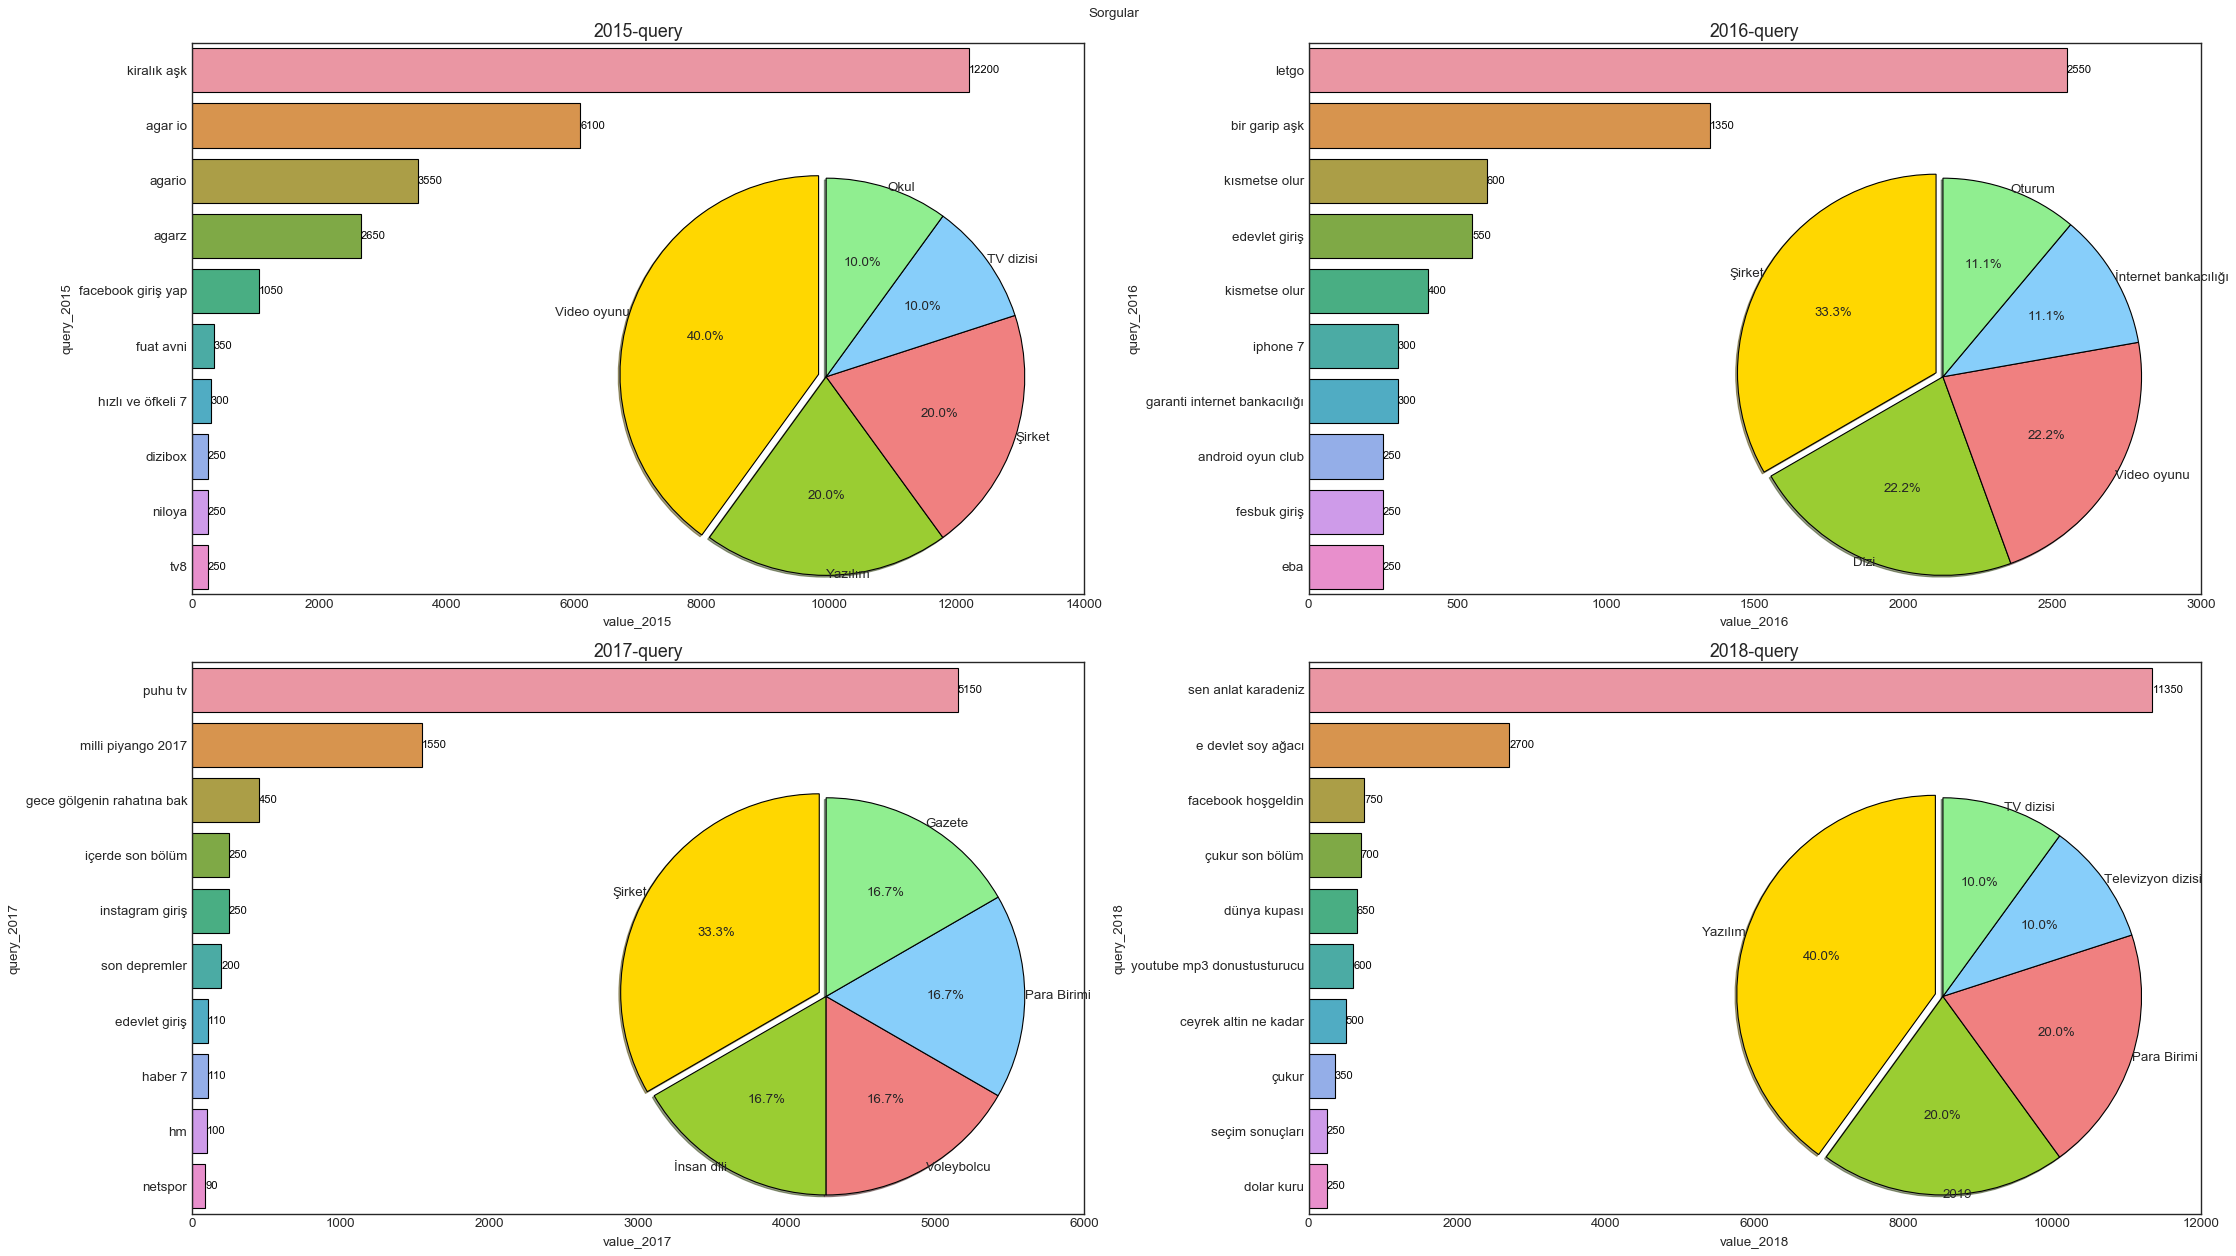

In [60]:
fig, axes = plt.subplots(nrows=2, ncols=2 , figsize=(28, 16), sharey=False)
fig.suptitle('Sorgular')


# 2015
sns.barplot(ax=axes[0,0], y=queries_rise.query_2015[:10], x=queries_rise.value_2015[:10])
axes[0,0].set_title("2015-query")
axes[0][0].bar_label(axes[0][0].containers[0], color="black", size=10);
axins00 = inset_axes(axes[0,0],width="40%", height="40%", bbox_to_anchor=(.0, .2, .9, .9),bbox_transform=axes[0,0].transAxes, loc=4)

pie_chart(axins00,2015)

# plt.legend()
# axins00.set_xlabel("ilk 5 Konu")


# 2016
sns.barplot(ax=axes[0,1], y=queries_rise.query_2016[:10], x=queries_rise.value_2016[:10])
axes[0,1].set_title("2016-query")
axes[0][1].bar_label(axes[0][1].containers[0], color="black", size=10);
axins01 = inset_axes(axes[0,1], width="40%", height="40%", bbox_to_anchor=(.0, .2, .9, .9),bbox_transform=axes[0,1].transAxes, loc=4)
pie_chart(axins01,2016)

# 2017
sns.barplot(ax=axes[1,0], y=queries_rise.query_2017[:10], x=queries_rise.value_2017[:10])
axes[1,0].set_title("2017-query")
axes[1][0].bar_label(axes[1][0].containers[0], color="black", size=10);
axins10 = inset_axes(axes[1,0], width="40%", height="40%", bbox_to_anchor=(.0, .2, .9, .9),bbox_transform=axes[1,0].transAxes, loc=4)
pie_chart(axins10,2017)

# 2018
sns.barplot(ax=axes[1,1], y=queries_rise.query_2018[:10], x=queries_rise.value_2018[:10])
axes[1,1].set_title("2018-query");
axes[1][1].bar_label(axes[1][1].containers[0], color="black", size=10);
axins11 = inset_axes(axes[1,1], width="40%", height="40%", bbox_to_anchor=(.0, .2, .9, .9),bbox_transform=axes[1,1].transAxes, loc=4)
pie_chart(axins11,2018)

plt.tight_layout() 


In [192]:
type_query = df_rise_q.filter(regex="query")

In [193]:
type_query

,query_2011,query_2012,query_2013,query_2014,query_2015,query_2016,query_2017,query_2018,query_2019,query_2020,query_2021,query_2022
0,muhteşem yüzyıl,ask.fm,güneşi beklerken,kiraz mevsimi,kiralık aşk,letgo,puhu tv,sen anlat karadeniz,mucize doktor,sokağa çıkma yasağı,dizipal,brent petrol
1,acunn,gangnam style,halk tv,kardeş payı,agar io,bir garip aşk,isimsizler,e devlet soy ağacı,ekrem imamoğlu,koronavirüs,_shopping,disney plus
2,bombom,hahasport,bicaps,kaçak gelinler,agario,kısmetse olur,milli piyango 2017,çukur son bölüm,kandilli rasathanesi,yarınki hava durumu,dogecoin,öba
3,morpa kampüs,yandex,legend online,arkadaşım hoşgeldin,agarz,edevlet giriş,gece gölgenin rahatına bak,facebook hoşgeldin,benz,coronavirus,exxen,dünya kupası
4,grupfoni,tubidy,outlook,recep ivedik 4,facebook giriş yap,kismetse olur,içerde son bölüm,dünya kupası,son depremler,corona belirtileri,binance,hektaş hisse
5,trendyol,youtube mp3,amk,onedio,fuat avni,iphone 7,instagram giriş,youtube mp3 donustusturucu,netflix,fahrettin koca,selçukspor,iphone 13 pro max
6,e devlet,vip dükkan,sözcü,ysk,hızlı ve öfkeli 7,garanti internet bankacılığı,son depremler,ceyrek altin ne kadar,seçim sonuçları,hes kodu alma,sedat peker,trt1 canlı
7,edevlet,dizimag,kliksa,irem derici,dizibox,hint dizileri,garanti internet bankacılığı,çukur,beinsport,zoom,coinmarketcap,obilet
8,wolfteam,kim milyoner olmak ister,tozlu giyim,dailymotion,niloya,android oyun club,netspor,seçim sonuçları,e nabız,savefrom.net,paribu,sasa hisse
9,markofoni,arsız bela,youtube dönüştürücü,izlesene,eba,facebook giris,edevlet giriş,dolar kuru,süperlig,eba giriş,bitcoin kaç dolar,dolar/tl


In [234]:
pd.set_option('display.max_columns', 1000) 

In [235]:
type_query["query_2011"].map(lambda x: trends.suggestions(x))

0     [{'mid': '/m/0g581c_', 'title': 'Muhteşem Yüzy...
1     [{'mid': '/g/11fx8yywjy', 'title': 'Acunn.com'...
2     [{'mid': '/g/15dpv4g7', 'title': 'Bombom', 'ty...
3     [{'mid': '/g/11hmdd3f56', 'title': 'Morpa Kamp...
4     [{'mid': '/g/11g4lkgrq3', 'title': 'Grupfoni',...
5     [{'mid': '/g/11bwy_2wc_', 'title': 'Trendyol',...
6     [{'mid': '/g/11bt_n_myt', 'title': 'e-Devlet',...
7                                                    []
8     [{'mid': '/g/1215chzy', 'title': 'Wolfteam', '...
9                                                    []
10    [{'mid': '/g/11bytwbvsl', 'title': 'Limango', ...
11    [{'mid': '/m/03hhvh8', 'title': 'sahibinden.co...
12    [{'mid': '/g/1235wl6d', 'title': 'Muud', 'type...
13    [{'mid': '/m/0hn1vcg', 'title': 'Twitter', 'ty...
14    [{'mid': '/g/11ny1n3759', 'title': 'Squid Game...
15    [{'mid': '/g/11f08_hbzg', 'title': 'Friv', 'ty...
16                                                   []
17                                              

In [205]:
trends.trending_searches(pn="turkey")

,0
0,PSG
1,Anadolu Üniversitesi
2,Di Maria
3,ASTOR halka arz sonuçları
4,Şule Yüksel Şenler
5,Ahmet Davutoğlu
6,Opel Astra
7,Porto
8,Pınar Deniz
9,PSV


In [199]:
trends.interest_by_region().sort_values(by="")

,
geoName,
Yozgat,24
Kilis,26
Erzurum,28
Kars,28
Siirt,29
...,...
Kırklareli,76
Karaman,76
İzmir,83


In [153]:
trends.suggestions("GÜNEŞİ BEKLERKEN")


[{'mid': '/g/12hhhd5s6', 'title': 'Güneşi Beklerken', 'type': 'Dizi'},
 {'mid': '/m/0q5sfs7', 'title': 'Güneşi Beklerken', 'type': 'Müzik albümü'}]

In [159]:
kw_list = ["pizza"]

In [157]:
trends.categories()


{'children': [{'children': [{'name': 'Açık Artırmalar', 'id': 292},
    {'name': 'Alışveriş Portalları ve Arama Motorları', 'id': 531},
    {'name': 'Antikalar ve Koleksiyon', 'id': 64},
    {'name': 'Bilet Satışları', 'id': 614},
    {'children': [{'name': 'CD ve Müzik Alışverişi', 'id': 217},
      {'children': [{'name': 'DVD ve Video Kiralama', 'id': 1145}],
       'name': 'DVD ve Video Alışverişi',
       'id': 210},
      {'children': [{'name': 'DVD ve Video Kiralama', 'id': 1145}],
       'name': "Kiralık Eğlence CD'leri & DVD'leri & Oyunları",
       'id': 1144},
      {'name': 'Kitapçılar', 'id': 355},
      {'name': 'Video Oyunu Satıcıları', 'id': 1146}],
     'name': 'Eğlence Ürünleri',
     'id': 1143},
    {'children': [{'name': 'Stok Fotoğrafçılığı', 'id': 574}],
     'name': 'Fotoğraf ve Video Hizmetleri',
     'id': 576},
    {'children': [{'name': 'Ayakkabılar', 'id': 697},
      {'name': 'Başa takılan ürünler', 'id': 991},
      {'name': 'Ceketler', 'id': 993},
      {

In [151]:
trends.interest_by_region()

,GÜNEŞİ BEKLERKEN
geoName,
Adana,0
Adıyaman,0
Afyonkarahisar,0
Aksaray,0
Amasya,0
...,...
Çorum,0
İstanbul,0
İzmir,0


In [124]:
trends.build_payload(kw_list=["e-okul", "Machine Learning", "yapay zeka"], timeframe='2018-12-14 2022-01-25')
data = trends.interest_by_region()
data = data.sort_values(by="yapay zeka", ascending=False)

In [130]:
trends.build_payload(kw_list=["test"], timeframe='2018-12-14 2022-01-25')
data = trends.interest_by_region()
data = data.sort_values(by="test", ascending=False)

In [133]:
import seaborn as sns

In [1]:
plt.figure(figsize=(22,15))
sns.barplot(data=data, x="test", y=data.index)

NameError: name 'plt' is not defined